Para ilustrar la implementacion de este medidor de rendimiento, vamos a asumir que corremos una estrategia basica (Buy and Hold), que significa que compraremos el activo, y lo mantendremos hasta una fecha fija establecida

In [28]:
pip install yfinance --upgrade --no-cache-dir

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf

#Matplotlib
import matplotlib as plt
import matplotlib.style
plt.style.use('ggplot')

In [59]:
asset = 'EURUSD=X'
start_date = '2017-01-01'
end_date = '2022-02-25'
data = yf.download(asset, interval='1d', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


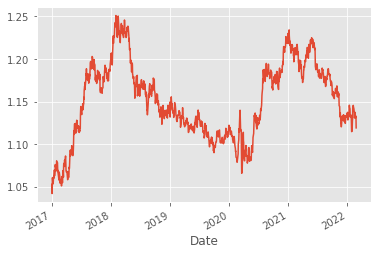

In [61]:
data['Adj Close'].plot()

# Calculando el CAGR
**NOTA:** La siguiente funcion asume que el dataframe inicial convierte intervalos **DIARIOS**

In [32]:
# Tomara como Parametro DF que significa DataFrame
def CAGR(DF):
  # Crear copia del dataframe
  df = DF.copy()

  # Calculamos retorno diario, que es el porcentaje que cambio de dia a dia
  # Con ayuda del metodo Porcentage change
  df['retorno_diario'] = df['Adj Close'].pct_change()

  # Añadimos 1 que significa que empezamos con un dolar
  # Metodo cumulative product o producto acumulado
  df['retorno_acumulado'] = (1 + df['retorno_diario']).cumprod()

  # Dividimos la longitud del dataframe entre 252 dias habiles de trading
  numero_de_anios = len(df)/252

  # Usamos el '[-1]' para retornar el ultimo valor del dataframe
  CAGR = (df['retorno_acumulado'][-1])**(1 / numero_de_anios) -1

  return CAGR


*   **.cumprod():** Calcula el producto acumulativo. Si se quiere la suma acumulativa, entonces seria *.cumsum()*
*   **n = len(df)/252:**
    *   **len(df):** Numero de dias habiles de Trading (Numero de filas/periodos en el dataframe)
    *   **len(df)/252:** 252 es el numero de dias habiles de Trading en un Año (generalmente activos que se rigen a un calendario de operaciones de un exchange). Dividiendo el numero de periodos para el numero de dias habiles, obtenemos el numero de años en nuestro dataframe.





In [62]:
CAGR(data)

0.011547118458369532

Resultado aprox de 0.01154, significa que tenemos un CAGR de:
#1.15%
